In [0]:
##Necessary imports..
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#!pip install kaggle
import os
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ankit01mishra","key":"506293e8fa3edef4d4b8d7c939f4a2e0"}'}

In [0]:
##File configuration
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c new-york-city-taxi-fare-prediction

  0% 0.00/335k [00:00<?, ?B/s]
100% 335k/335k [00:00<00:00, 45.7MB/s]
  0% 0.00/960k [00:00<?, ?B/s]
100% 960k/960k [00:00<00:00, 84.6MB/s]
 99% 1.55G/1.56G [00:18<00:00, 97.2MB/s]
100% 1.56G/1.56G [00:18<00:00, 90.8MB/s]
  0% 0.00/486 [00:00<?, ?B/s]
100% 486/486 [00:00<00:00, 489kB/s]


In [0]:
!ls

GCP-Coupons-Instructions.rtf  sample_data	     test.csv
kaggle.json		      sample_submission.csv  train.csv.zip


In [0]:
##unzipping the dataset...
!unzip df.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               


In [0]:
##setting the sns style
sns.set(color_codes = True)
%matplotlib inline

In [0]:
##Loading only 1M rows for analysis perpose...
df = pd.read_csv("train.csv",nrows = 1_000_000,parse_dates = ['pickup_datetime'])
df.head()

key  fare_amount           pickup_datetime  \
0    2009-06-15 17:26:21.0000001          4.5 2009-06-15 17:26:21+00:00   
1    2010-01-05 16:52:16.0000002         16.9 2010-01-05 16:52:16+00:00   
2   2011-08-18 00:35:00.00000049          5.7 2011-08-18 00:35:00+00:00   
3    2012-04-21 04:30:42.0000001          7.7 2012-04-21 04:30:42+00:00   
4  2010-03-09 07:51:00.000000135          5.3 2010-03-09 07:51:00+00:00   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.844311        40.721319         -73.841610         40.712278   
1        -74.016048        40.711303         -73.979268         40.782004   
2        -73.982738        40.761270         -73.991242         40.750562   
3        -73.987130        40.733143         -73.991567         40.758092   
4        -73.968095        40.768008         -73.956655         40.783762   

   passenger_count  
0                1  
1                1  
2                2  
3                1  
4                1

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
key                  1000000 non-null object
fare_amount          1000000 non-null float64
pickup_datetime      1000000 non-null datetime64[ns, UTC]
pickup_longitude     1000000 non-null float64
pickup_latitude      1000000 non-null float64
dropoff_longitude    999990 non-null float64
dropoff_latitude     999990 non-null float64
passenger_count      1000000 non-null int64
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 61.0+ MB


In [0]:
##reducing the data size...
df['fare_amount'] = df['fare_amount'].astype('float32')
df['passenger_count'] = df['passenger_count'].astype("int16")
df['key'] = df['key'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
key                  1000000 non-null object
fare_amount          1000000 non-null float32
pickup_datetime      1000000 non-null datetime64[ns, UTC]
pickup_longitude     1000000 non-null float64
pickup_latitude      1000000 non-null float64
dropoff_longitude    999990 non-null float64
dropoff_latitude     999990 non-null float64
passenger_count      1000000 non-null int16
dtypes: datetime64[ns, UTC](1), float32(1), float64(4), int16(1), object(1)
memory usage: 51.5+ MB


In [0]:
##Summary statistics for the dataset..
df.describe()

##Negative fare amount...these are to be deleted..

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  1000000.000000    1000000.000000   1000000.000000      999990.000000   
mean        11.344627        -72.526640        39.929008         -72.527860   
std          9.818961         12.057937         7.626154          11.324494   
min        -44.906250      -3377.680935     -3116.285383       -3383.296608   
25%          6.000000        -73.992060        40.734965         -73.991385   
50%          8.500000        -73.981792        40.752695         -73.980135   
75%         12.500000        -73.967094        40.767154         -73.963654   
max        500.000000       2522.271325      2621.628430          45.581619   

       dropoff_latitude  passenger_count  
count     999990.000000   1000000.000000  
mean          39.919954         1.684924  
std            8.201418         1.323911  
min        -3114.338567         0.000000  
25%           40.734046         1.000000  
50%           40.753166         1.000000  
75%           40.768129         2.000000  
max         1651.553433       208.000000

In [0]:
##GOAL:---
"""
The average fare_amount is about $11.4 USD with 
a standard deviation of $9.9 USD. When building a predictive model we want to be better than $9.9 USD :)
"""
df = df[df['fare_amount'] >= 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999962 entries, 0 to 999999
Data columns (total 8 columns):
key                  999962 non-null object
fare_amount          999962 non-null float32
pickup_datetime      999962 non-null datetime64[ns, UTC]
pickup_longitude     999962 non-null float64
pickup_latitude      999962 non-null float64
dropoff_longitude    999952 non-null float64
dropoff_latitude     999952 non-null float64
passenger_count      999962 non-null int16
dtypes: datetime64[ns, UTC](1), float32(1), float64(4), int16(1), object(1)
memory usage: 59.1+ MB


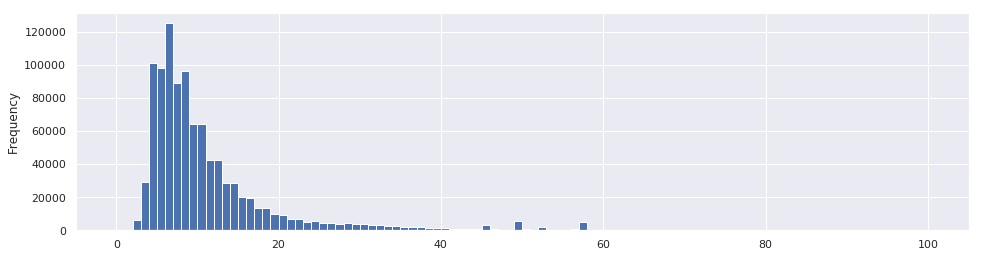

In [0]:
##Histogram of fare_amount..
plt.figure(figsize = (16,4))
df['fare_amount'].plot.hist(bins = 100,range = (0,100))

##There are few spikes bw 40$ and 60$ this could be some fixed price..

In [0]:
##Removing the missing data points...
df = df.dropna(how = 'any', axis = 'rows')

In [0]:
##Loading the test dataset...
test = pd.read_csv("test.csv")
print("Shape:-",test.shape)

Shape:- (9914, 7)


In [0]:
summary_test = test.describe()

In [0]:
summary_test

pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
count       9914.000000      9914.000000        9914.000000       9914.000000   
mean         -73.974722        40.751041         -73.973657         40.751743   
std            0.042774         0.033541           0.039072          0.035435   
min          -74.252193        40.573143         -74.263242         40.568973   
25%          -73.992501        40.736125         -73.991247         40.735254   
50%          -73.982326        40.753051         -73.980015         40.754065   
75%          -73.968013        40.767113         -73.964059         40.768757   
max          -72.986532        41.709555         -72.990963         41.696683   

       passenger_count  
count      9914.000000  
mean          1.671273  
std           1.278747  
min           1.000000  
25%           1.000000  
50%           1.000000  
75%           2.000000  
max           6.000000

In [0]:
summary_test['pickup_longitude']['min']

-74.252193

In [0]:
## Creating a bouding box as of Test dataset... based on longitude and lattitude...
def select_within_boundingbox(df, BB):
    return (df.pickup_longitude >= BB[0]) & (df.pickup_longitude <= BB[1]) & \
           (df.pickup_latitude >= BB[2]) & (df.pickup_latitude <= BB[3]) & \
           (df.dropoff_longitude >= BB[0]) & (df.dropoff_longitude <= BB[1]) & \
           (df.dropoff_latitude >= BB[2]) & (df.dropoff_latitude <= BB[3])


BB = [summary_test['pickup_longitude']['min'],
     summary_test['pickup_longitude']['max'],
     summary_test['pickup_latitude']['min'],
     summary_test['pickup_latitude']['max']]

##Loading the images..
nyc_map = plt.imread('https://aiblog.nl/download/nyc_-74.5_-72.8_40.5_41.8.png')

# load extra image to zoom in on NYC
BB_zoom = (-74.3, -73.7, 40.5, 40.9)
nyc_map_zoom = plt.imread('https://aiblog.nl/download/nyc_-74.3_-73.7_40.5_40.9.png')

In [0]:
##redifining train dataset..
df = df[select_within_boundingbox(df, BB)]
print('New size: %d' % len(df))

New size: 978788


In [0]:
# this function will be used more often to plot data on the NYC map
def plot_on_map(df, BB, nyc_map, s=10, alpha=0.2):
    fig, axs = plt.subplots(1, 2, figsize=(16,10))
    axs[0].scatter(df.pickup_longitude, df.pickup_latitude, zorder=1, alpha=alpha, c='magenta', s=s)
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2], BB[3]))
    axs[0].set_title('Pickup locations')
    axs[0].imshow(nyc_map, zorder=0, extent=BB)

    axs[1].scatter(df.dropoff_longitude, df.dropoff_latitude, zorder=1, alpha=alpha, c='magenta', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Dropoff locations')
    axs[1].imshow(nyc_map, zorder=0, extent=BB)

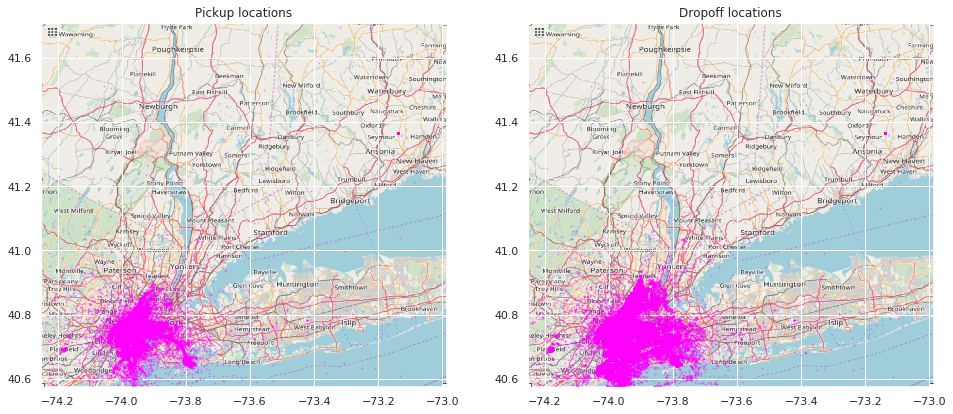

In [0]:
# plot training data on map
plot_on_map(df, BB, nyc_map, s=1, alpha=0.3)

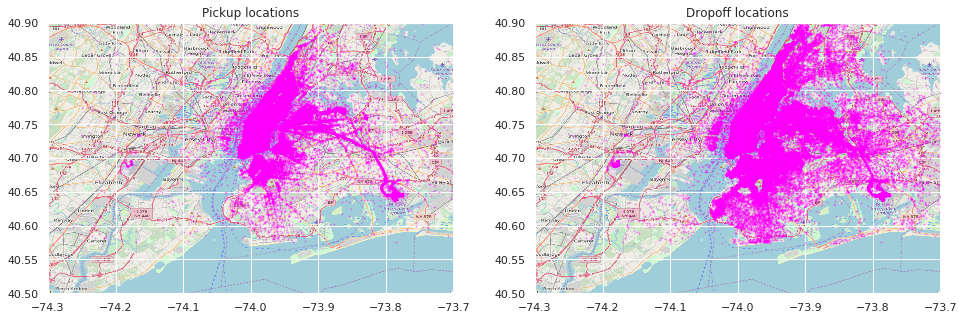

In [0]:
# plot training data on map zoomed in
plot_on_map(df, BB_zoom, nyc_map_zoom, s=1, alpha=0.3)

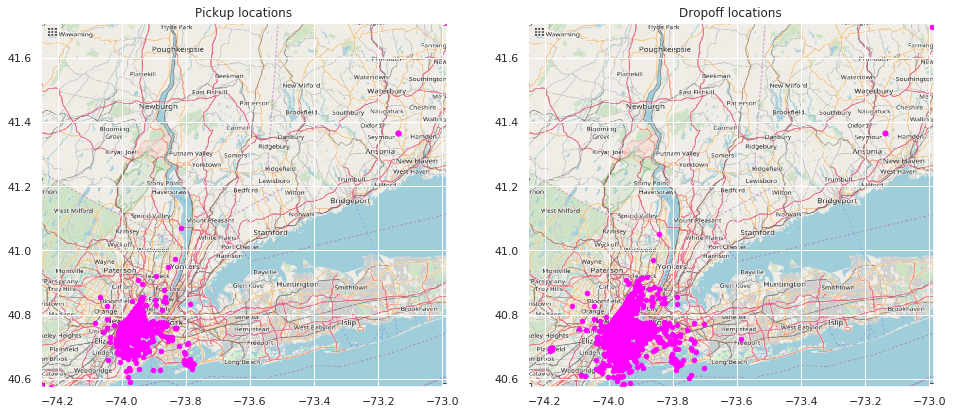

In [0]:
# plot test data on map
plot_on_map(test, BB, nyc_map, alpha=1.0, s=20)


In [0]:
"""
From the training data scatter plot we see that some
locations are in the water. Either these are considered as noise, or we drop them from the dataset. I decided to drop them 
"""

def plot_hires(df, BB, figsize=(12, 12), ax=None, c=('r', 'b')):
    
    if ax == None:
        fig, ax = plt.subplots(1, 1, figsize=figsize)

    idx = select_within_boundingbox(df, BB)
    ax.scatter(df[idx].pickup_longitude, df[idx].pickup_latitude, c=c[0], s=0.01, alpha=0.5)
    ax.scatter(df[idx].dropoff_longitude, df[idx].dropoff_latitude, c=c[1], s=0.01, alpha=0.5)
 



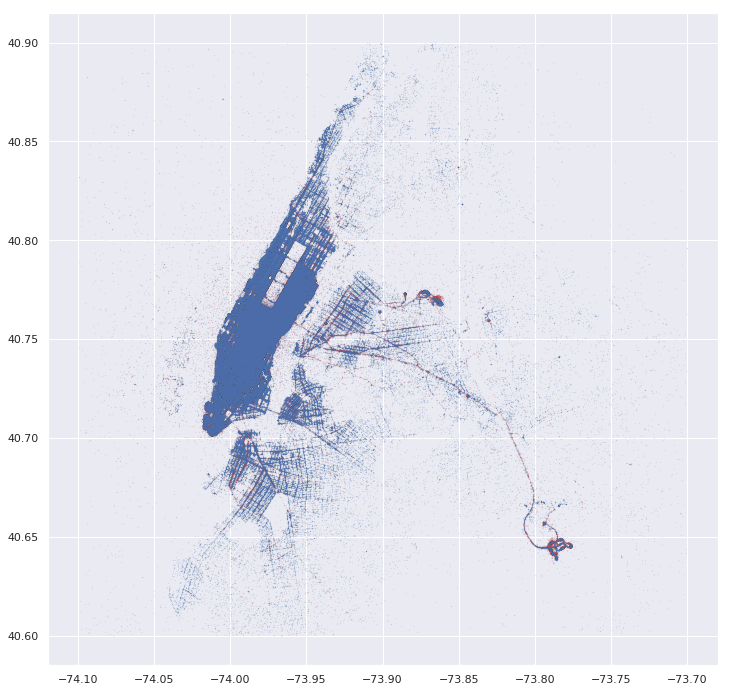

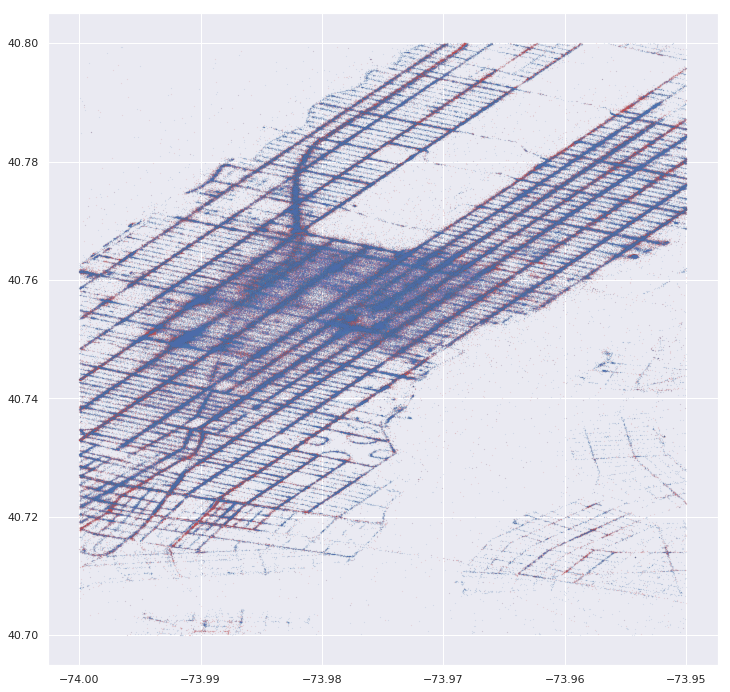

In [0]:
##If we reduce the size it will reflect the strees...

plot_hires(df, (-74.1, -73.7, 40.6, 40.9))
plot_hires(df, (-74, -73.95, 40.7, 40.8))

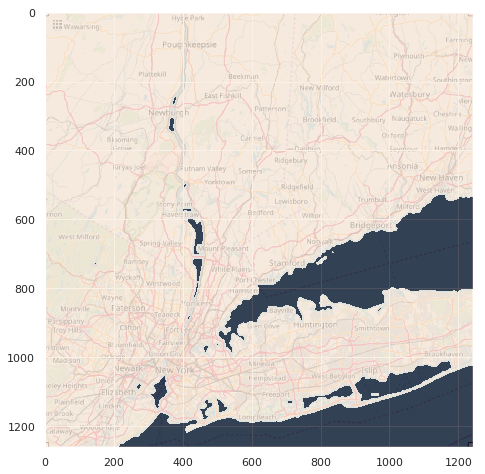

In [0]:
# read nyc mask and turn into boolean map with
# land = True, water = False
nyc_mask = plt.imread('https://aiblog.nl/download/nyc_mask-74.5_-72.8_40.5_41.8.png')[:,:,0] > 0.9

plt.figure(figsize=(8,8))
plt.imshow(nyc_map, zorder=0)
plt.imshow(nyc_mask, zorder=1, alpha=0.7)

In [0]:
# translate longitude/latitude coordinate into image xy coordinate
def lonlat_to_xy(longitude, latitude, dx, dy, BB):
    return (dx*(longitude - BB[0])/(BB[1]-BB[0])).astype('int'), \
           (dy - dy*(latitude - BB[2])/(BB[3]-BB[2])).astype('int')


pickup_x, pickup_y = lonlat_to_xy(df.pickup_longitude, df.pickup_latitude, 
                                  nyc_mask.shape[1], nyc_mask.shape[0], BB)
dropoff_x, dropoff_y = lonlat_to_xy(df.dropoff_longitude, df.dropoff_latitude, 
                                  nyc_mask.shape[1], nyc_mask.shape[0], BB)


idx = (nyc_mask[pickup_y, pickup_x] & nyc_mask[dropoff_y, dropoff_x])
print("Number of trips in water: {}".format(np.sum(~idx)))

Number of trips in water: 15066


In [0]:
##Remove data points  from water..
def remove_datapoints_from_water(df):
    def lonlat_to_xy(longitude, latitude, dx, dy, BB):
        return (dx*(longitude - BB[0])/(BB[1]-BB[0])).astype('int'), \
               (dy - dy*(latitude - BB[2])/(BB[3]-BB[2])).astype('int')

    # define bounding box
    BB = (-74.5, -72.8, 40.5, 41.8)
    
    # read nyc mask and turn into boolean map with
    # land = True, water = False
    nyc_mask = plt.imread('https://aiblog.nl/download/nyc_mask-74.5_-72.8_40.5_41.8.png')[:,:,0] > 0.9
    
    # calculate for each lon,lat coordinate the xy coordinate in the mask map
    pickup_x, pickup_y = lonlat_to_xy(df.pickup_longitude, df.pickup_latitude, 
                                      nyc_mask.shape[1], nyc_mask.shape[0], BB)
    dropoff_x, dropoff_y = lonlat_to_xy(df.dropoff_longitude, df.dropoff_latitude, 
                                      nyc_mask.shape[1], nyc_mask.shape[0], BB)    
    # calculate boolean index
    idx = nyc_mask[pickup_y, pickup_x] & nyc_mask[dropoff_y, dropoff_x]
    
    # return only datapoints on land
    return df[idx]


In [0]:
print('Old size: %d' % len(df))
df = remove_datapoints_from_water(df)
print('New size: %d' % len(df))

Old size: 978788
New size: 978658


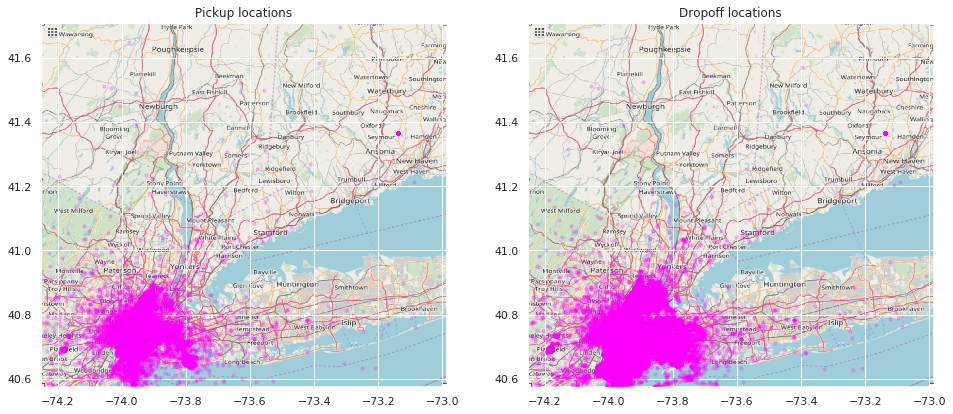

In [0]:
# plot training data
plot_on_map(df, BB, nyc_map)

In [0]:
##Let's check the passengers count column..
df['passenger_count'].describe()

count    978658.000000
mean          1.684966
std           1.307672
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: passenger_count, dtype: float64

In [0]:
##Getting the haversine distance..
def haversine_distance(lat1, long1, lat2, long2):
    data = [df, test]
    for i in data:
        R = 6371  #radius of earth in kilometers
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        i['H_Distance'] = d
    return d

In [0]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

In [0]:
##datapoint density per square mile..
# For this plot and further analysis, we need a function to calculate the distance in miles between locations in lon,lat coordinates.
# This function is based on https://stackoverflow.com/questions/27928/
# calculate-distance-between-two-latitude-longitude-points-haversine-formula 
# return distance in miles
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a)) # 2*R*asin...

# First calculate two arrays with datapoint density per sq mile
n_lon, n_lat = 200, 200 # number of grid bins per longitude, latitude dimension
density_pickup, density_dropoff = np.zeros((n_lat, n_lon)), np.zeros((n_lat, n_lon)) # prepare arrays

# To calculate the number of datapoints in a grid area, the numpy.digitize() function is used. 
# This function needs an array with the (location) bins for counting the number of datapoints
# per bin.
bins_lon = np.zeros(n_lon+1) # bin
bins_lat = np.zeros(n_lat+1) # bin
delta_lon = (BB[1]-BB[0]) / n_lon # bin longutide width
delta_lat = (BB[3]-BB[2]) / n_lat # bin latitude height
bin_width_miles = distance(BB[2], BB[1], BB[2], BB[0]) / n_lon # bin width in miles
bin_height_miles = distance(BB[3], BB[0], BB[2], BB[0]) / n_lat # bin height in miles
for i in range(n_lon+1):
    bins_lon[i] = BB[0] + i * delta_lon
for j in range(n_lat+1):
    bins_lat[j] = BB[2] + j * delta_lat
    
# Digitize per longitude, latitude dimension
inds_pickup_lon = np.digitize(df.pickup_longitude, bins_lon)
inds_pickup_lat = np.digitize(df.pickup_latitude, bins_lat)
inds_dropoff_lon = np.digitize(df.dropoff_longitude, bins_lon)
inds_dropoff_lat = np.digitize(df.dropoff_latitude, bins_lat)

# Count per grid bin
# note: as the density_pickup will be displayed as image, the first index is the y-direction, 
#       the second index is the x-direction. Also, the y-direction needs to be reversed for
#       properly displaying (therefore the (n_lat-j) term)
dxdy = bin_width_miles * bin_height_miles
for i in range(n_lon):
    for j in range(n_lat):
        density_pickup[j, i] = np.sum((inds_pickup_lon==i+1) & (inds_pickup_lat==(n_lat-j))) / dxdy
        density_dropoff[j, i] = np.sum((inds_dropoff_lon==i+1) & (inds_dropoff_lat==(n_lat-j))) / dxdy

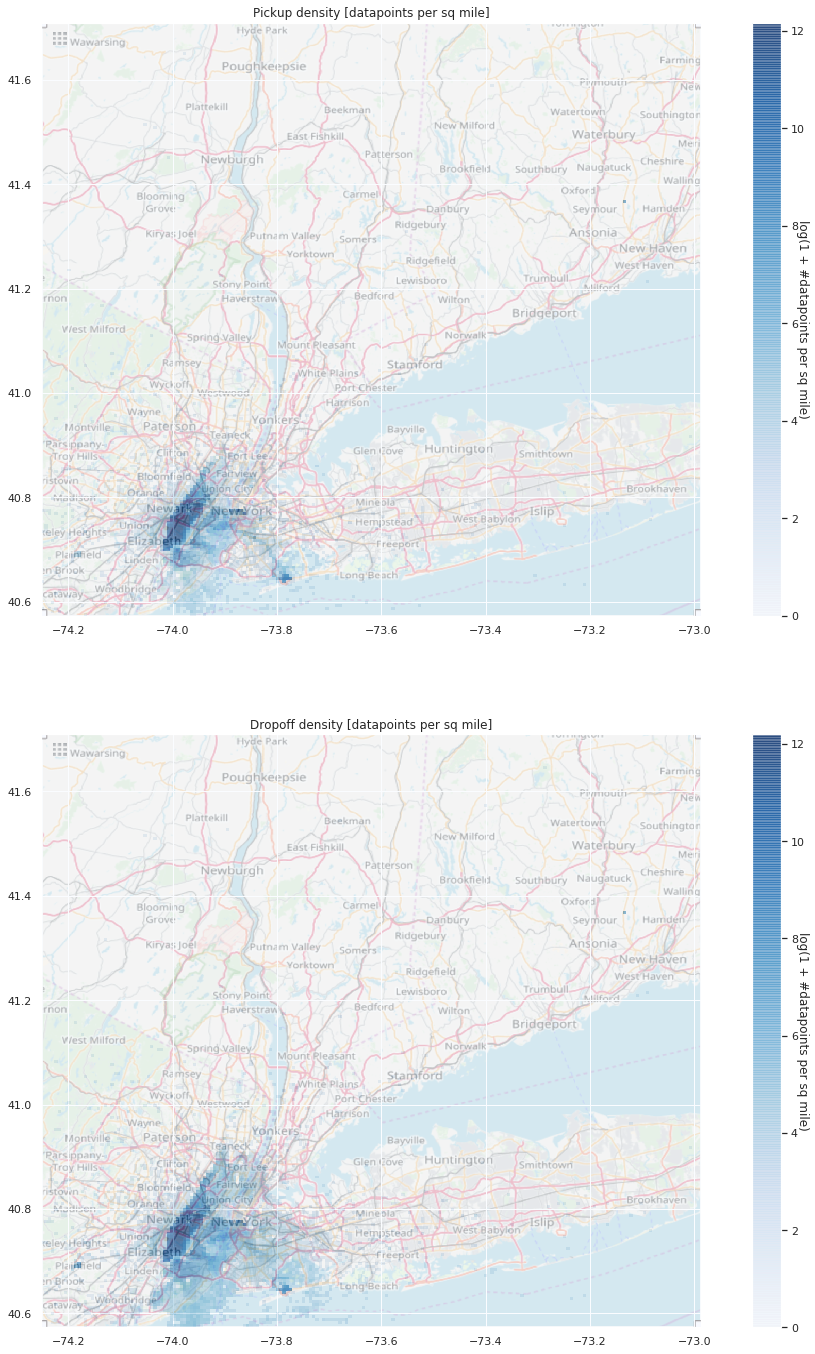

In [0]:
# Plot the density arrays
fig, axs = plt.subplots(2, 1, figsize=(18, 24))
axs[0].imshow(nyc_map, zorder=0, extent=BB);
im = axs[0].imshow(np.log1p(density_pickup), zorder=1, extent=BB, alpha=0.6, cmap='Blues')
axs[0].set_title('Pickup density [datapoints per sq mile]')
cbar = fig.colorbar(im, ax=axs[0])
cbar.set_label('log(1 + #datapoints per sq mile)', rotation=270)

axs[1].imshow(nyc_map, zorder=0, extent=BB);
im = axs[1].imshow(np.log1p(density_dropoff), zorder=1, extent=BB, alpha=0.6, cmap='Blues')
axs[1].set_title('Dropoff density [datapoints per sq mile]')
cbar = fig.colorbar(im, ax=axs[1])
cbar.set_label('log(1 + #datapoints per sq mile)', rotation=270)

In [0]:
# add time information
df['year'] = df.pickup_datetime.apply(lambda t: t.year)
df['weekday'] = df.pickup_datetime.apply(lambda t: t.weekday())
df['hour'] = df.pickup_datetime.apply(lambda t: t.hour)
df['month'] = df.pickup_datetime.apply(lambda t:t.month)
df['day'] = df.pickup_datetime.apply(lambda t:t.day)

In [0]:
# some constants needed to calculate pickup traffic density
n_hours = 24
n_weekdays = 7
n_years = 7
n_bins_lon = 30
n_bins_lat = 30

# focus on traffic in Manhattan
BB_traffic = (-74.025, -73.925, 40.7, 40.8)

# define function to calculate pickup traffic density
def calculate_trafic_density(df):
    traffic = np.zeros((n_years, n_weekdays, n_hours, n_bins_lat, n_bins_lon))
    
    # To calculate the number of datapoints in a grid area, the numpy.digitize() function is used. 
    # This function needs an array with the (location) bins for counting the number of datapoints
    # per bin.
    bins_lon = np.zeros(n_bins_lon+1) # bin
    bins_lat = np.zeros(n_bins_lat+1) # bin
    
    delta_lon = (BB_traffic[1]-BB_traffic[0]) / n_bins_lon # bin longutide width
    delta_lat = (BB_traffic[3]-BB_traffic[2]) / n_bins_lat # bin latitude height
    
    for i in range(n_bins_lon+1):
        bins_lon[i] = BB_traffic[0] + i * delta_lon
    for j in range(n_bins_lat+1):
        bins_lat[j] = BB_traffic[2] + j * delta_lat
    
    # Count per grid bin
    # note: as the density_pickup will be displayed as image, the first index is the y-direction, 
    #       the second index is the x-direction. Also, the y-direction needs to be reversed for
    #       properly displaying (therefore the (n_lat-j) term)
    for y in range(n_years):
        for d in range(n_weekdays):
            for h in range(n_hours):
                idx = (df.year==(2009+y)) & (df.weekday==d) & (df.hour==h)

                # Digitize per longitude, latitude dimension
                inds_pickup_lon = np.digitize(df[idx].pickup_longitude, bins_lon)
                inds_pickup_lat = np.digitize(df[idx].pickup_latitude, bins_lat)

                for i in range(n_bins_lon):
                    for j in range(n_bins_lat):
                        traffic[y, d, h, j, i] = traffic[y, d, h, j, i] + \
                                                 np.sum((inds_pickup_lon==i+1) & (inds_pickup_lat==j+1))
    
    return traffic 

# define function to plot pickup traffic density
def plot_traffic(traffic, y, d):
    days = {'monday' : 0, 'tuesday' : 1, 'wednesday' : 2, 'thursday' : 3, 'friday' : 4, 'saturday' : 5, 'sunday' : 6}
    fig, axs = plt.subplots(3,8,figsize=(18,7))
    axs = axs.ravel()
    for h in range(24):
        axs[h].imshow(traffic[y-2009,days[d],h,::-1,:], zorder=1, cmap='coolwarm', clim=(0, traffic.max()))
        axs[h].get_xaxis().set_visible(False)
        axs[h].get_yaxis().set_visible(False)
        axs[h].set_title('h={}'.format(h))
    fig.suptitle("Pickup traffic density, year={}, day={} (max_pickups={})".format(y, d, traffic.max()))

In [0]:
traffic = calculate_trafic_density(df)

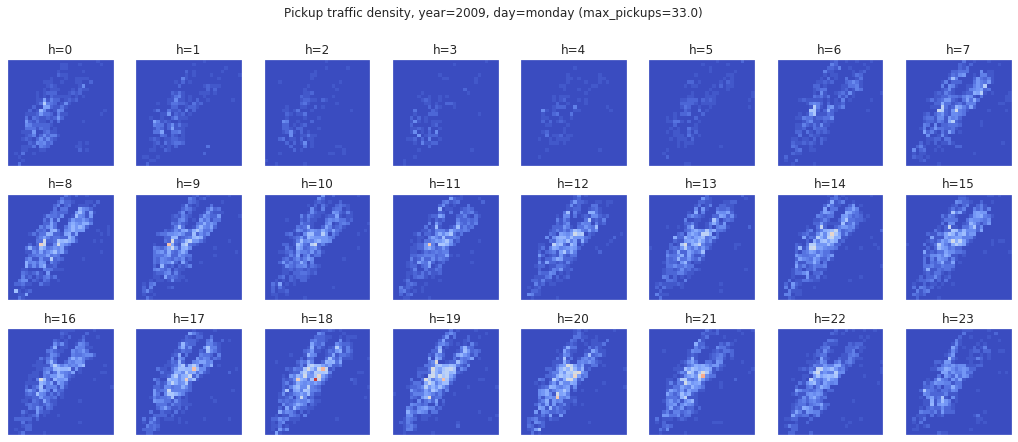

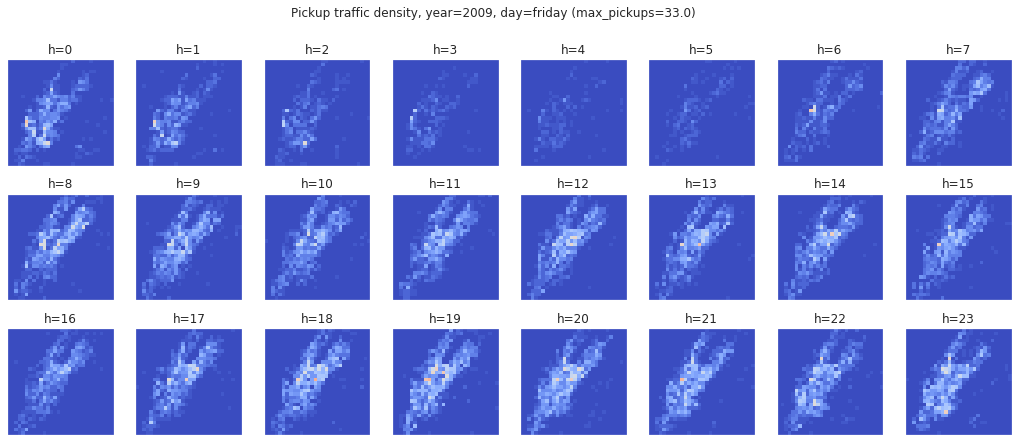

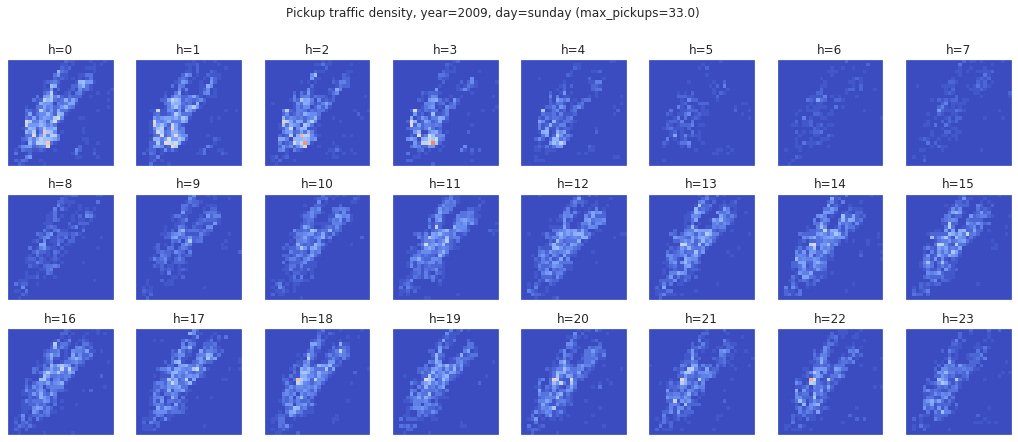

In [0]:
plot_traffic(traffic, 2009, 'monday')
plot_traffic(traffic, 2009, 'friday')
plot_traffic(traffic, 2009, 'sunday')

count    978658.000000
mean          3.324997
std           3.747618
min           0.000000
25%           1.254041
50%           2.152407
75%           3.916332
max         110.833077
Name: H_Distance, dtype: float64

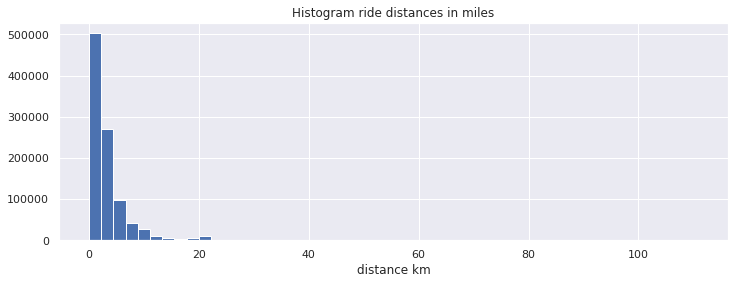

In [0]:
##Longer the distance more the fare...
df.H_Distance.hist(bins=50, figsize=(12,4))
plt.xlabel('distance km')
plt.title('Histogram ride distances in miles')
df.H_Distance.describe()

In [0]:
##we have mostly small rides...
df.groupby('passenger_count')['H_Distance', 'fare_amount'].mean()

##Thus we can say that more the distance more the fare..


##Notice the passenge count of 0{seems insignificant...}

H_Distance  fare_amount
passenger_count                         
0                  2.759259     8.716729
1                  3.281290    11.196888
2                  3.499559    11.785817
3                  3.366930    11.491061
4                  3.415534    11.695760
5                  3.325106    11.191526
6                  3.444661    12.264027

In [0]:
##Fare per KM
print("Average $USD/KM : {:0.2f}".format(df.fare_amount.sum()/df.H_Distance.sum()))

Average $USD/KM : 3.40


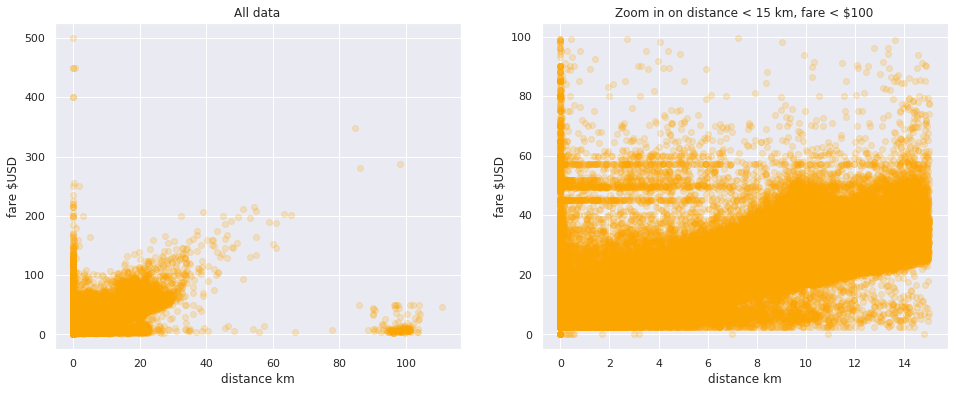

In [0]:
# scatter plot distance - fare
fig, axs = plt.subplots(1, 2, figsize=(16,6))
axs[0].scatter(df.H_Distance, df.fare_amount, alpha=0.2,c = 'orange')
axs[0].set_xlabel('distance km')
axs[0].set_ylabel('fare $USD')
axs[0].set_title('All data')

# zoom in on part of data
idx = (df.H_Distance < 15) & (df.fare_amount < 100)
axs[1].scatter(df[idx].H_Distance, df[idx].fare_amount, alpha=0.2,c = 'orange')
axs[1].set_xlabel('distance km')
axs[1].set_ylabel('fare $USD')
axs[1].set_title('Zoom in on distance < 15 km, fare < $100');

**From this plot we notice:

There are trips with zero distance but with a non-zero fare. Could this be trips from and to the same location? Predicting these fares will be difficult as there is likely not sufficient information in the dataset.
There are some trips with >50 miles travel distance but low fare. Perhaps these are discounted trips? Or the previously mentioned hotspot near Seymour (see density plots above)?
The horizontal lines in the right plot might indicate again the fixed fare trips to/from JFK airport.
Overall there seems to be a (linear) relation between distance and fare with an average rate of +/- 100/20 = 5 $USD/mile.**

In [0]:
##removing some datapoints as they are irrelevent...
# remove datapoints with distance <0.08 KMs
idx = (df.H_Distance >= 0.08)
print('Old size: %d' % len(df))
df = df[idx]
print('New size: %d' % len(df))

Old size: 978658
New size: 963016


In [0]:
##Fare per KMs

df['fare_per_km'] = df.fare_amount / df.H_Distance
df.fare_per_km.describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


count    963016.000000
mean          4.611020
std           7.906286
min           0.000000
25%           2.963721
50%           3.811203
75%           5.023265
max        2369.022141
Name: fare_per_km, dtype: float64

**The maximum fare $USD/mile seem to be very high. This could be due to wrong distance or fare data. On the other hand, let's analyse this somewhat further. In general taxi fare is calculate by

yfare=θ0+θ1⋅xdistance+θ2⋅xduration**

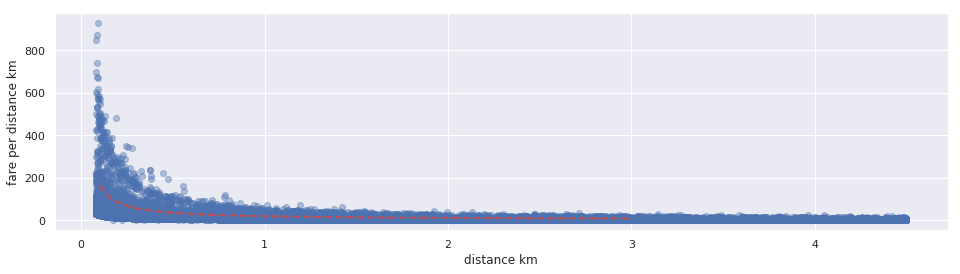

In [0]:
##Fare is very high...
plt.figure(figsize = (16,4))
idx = (df.H_Distance< 4.5) & (df.fare_amount < 100)
plt.scatter(df[idx].H_Distance, df[idx].fare_per_km,alpha = 0.4)
plt.xlabel('distance km')
plt.ylabel('fare per distance km')

# theta here is estimated by hand
theta = (16, 4.0)
x = np.linspace(0.1, 3, 50)
plt.plot(x, theta[0]/x + theta[1], '--', c='r', lw=2);

Note that the fare per distance has more spread for smaller distances (<0.5 mile) than larger distances. This could be explained as follows: we measure the distance from point to point and not by road. For smaller distances the difference between these two measurement methods is expected to be larger. This is one aspect I would guess a more advanced model (deep learning NN) would improve upon compared to a linear model.

[30/07/2018] An other reason why the spread for smaller distances is larger could be due to slow traffic at rush hours. Short drives at rush hours vary more in duration.

In [0]:
##deleting 
df = df.drop(df.loc[((df['pickup_latitude']==0) & (df['pickup_longitude']==0))&((df['dropoff_latitude']!=0) & (df['dropoff_longitude']!=0)) & (df['fare_amount']==0)].index, axis=0)

#dropoff latitude and longitude = 0
df.loc[((df['pickup_latitude']!=0) & (df['pickup_longitude']!=0))&((df['dropoff_latitude']==0) & (df['dropoff_longitude']==0)) & (df['fare_amount']==0)]

df = df.drop(df.loc[((df['pickup_latitude']!=0) & (df['pickup_longitude']!=0))&((df['dropoff_latitude']==0) & (df['dropoff_longitude']==0)) & (df['fare_amount']==0)].index, axis=0)

In [0]:
##Fare and distance both are 0
df[(df['H_Distance']==0)&(df['fare_amount']==0)]

##if present delete them..(as working with subset..)
df = df.drop(df[(df['H_Distance']==0)&(df['fare_amount']==0)].index, axis = 0)

In [0]:
#Fare is not 0 and is less than the base amount, but Distance is 0.
#Delete these rows as the minimum is $2.50, and these fares are incorrect values.(GOOGLE)
rush_hour = df.loc[(((df['hour']>=6)&(df['hour']<=20)) & ((df['weekday']>=1) & (df['weekday']<=5)) & (df['H_Distance']==0) & (df['fare_amount'] < 2.5))]
print(rush_hour.shape)

df=df.drop(rush_hour.index, axis=0)

Empty DataFrame
Columns: [key, fare_amount, pickup_datetime, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, passenger_count, H_Distance, year, weekday, hour, fare_per_km, month, day]
Index: []

In [0]:
#Between 8PM and 6AM on Mon-Fri
non_rush_hour = df.loc[(((df['hour']<6)|(df['hour']>20)) & ((df['weekday']>=1)&(df['weekday']<=5)) & (df['H_Distance']==0) & (df['fare_amount'] < 3.0))]
non_rush_hour.shape
#keep these. Since the fare_amount is not <2.5 (which is the base fare), these values seem legit to me.

(0, 15)

In [0]:
#Saturday and Sunday all hours
weekends = df.loc[((df['weekday']==0) | (df['weekday']==6)) & (df['H_Distance']==0) & (df['fare_amount'] < 3.0)]
weekends.shape

(0, 15)

In [0]:
s = df.loc[(df['H_Distance']!=0) & (df['fare_amount']==0)]
print(s.shape)

(9, 15)


In [0]:
##Hare imputation is required..
s['fare_amount'] = s.apply(
    lambda row: ((row['H_Distance'] * 1.56) + 2.50), axis=1
)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
##updating the df
df.update(s)

In [0]:
##Fare is not 0, but Distance is 0. These values need to be imputed.

s1 = df.loc[(df['H_Distance']==0) & (df['fare_amount']!=0)]

In [0]:
#Using our prior knowledge about the base price during weekdays and weekends for the cabs.
#I do not want to impute these 1502 values as they are legible ones.
s1.loc[(s1['fare_amount']<=3.0)&(s1['H_Distance']==0)]

s1['H_Distance'] = s1.apply(
lambda row: ((row['fare_amount']-2.50)/1.56), axis=1
)

df.update(s1)

In [0]:
df.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'H_Distance', 'year', 'weekday', 'hour',
       'fare_per_km', 'month', 'day'],
      dtype='object')

In [0]:
df['key'].head(8)

0      2009-06-15 17:26:21.0000001
1      2010-01-05 16:52:16.0000002
2     2011-08-18 00:35:00.00000049
3      2012-04-21 04:30:42.0000001
4    2010-03-09 07:51:00.000000135
5      2011-01-06 09:50:45.0000002
6      2012-11-20 20:35:00.0000001
7     2012-01-04 17:22:00.00000081
Name: key, dtype: object

In [0]:
##deleting coulmns and going for modelling

df = df.drop(['key','pickup_datetime'], axis = 1)

#MACHINE LEARNING MODELLING

In [0]:
##setting up modelling pipeline...

X = df.iloc[:,df.columns!='fare_amount']
y = df['fare_amount'].values


In [0]:
from sklearn.model_selection import cross_val_score
def model_score(estimator):
    return np.sqrt(-cross_val_score(estimator,X,y,cv= 10,scoring="neg_mean_squared_error")).mean()

In [0]:
#BECNCHMARK
##Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

##evaluating Model-1
model_score(lr)

4.510783997012007

In [0]:
##necessary imports..
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [0]:
##Train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 42)

In [0]:
#Validation function
n_folds = 10

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [0]:
##Making pipelines
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [0]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))


Lasso score: 4.5326 (0.1113)



In [0]:
##SIMPLE STACKING
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [0]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


In [0]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [0]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

In [0]:
##Final training
stacked_averaged_models.fit(X, y)
stacked_train_pred = stacked_averaged_models.predict(X)
print(rmsle(y, stacked_train_pred))


In [0]:
##XGBOOST training

model_xgb.fit(X, y)
xgb_train_pred = model_xgb.predict(X)
print(rmsle(y, xgb_train_pred))

In [0]:
##LGBM training
model_lgb.fit(X, y)
xgb_train_pred = model_xgb.predict(X)
print(rmsle(y, xgb_train_pred))

In [0]:
##Final ENSEMBLING...
print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))